# Exercise for UML

# Project Title - Spotify recommender system
## About the Dataset
These dataset contains 114000 song and metadata about the songs such as their popularity and genres. The exercise is divided in three part mainly EDA, PCA and Clustering and finally the recommender system.
Try to write your own functions and know your keyboard shortcuts.
You can work on GoogleCollab or work locally.

The dataset: https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv

# Part 1

## Goals of Part 1
    1. Clean up the dataset and check for duplicates
    2. EDA
    3. Plots
## Relevant libraries for this part
    1. Pandas
    2. Numpy
    3. Matplotlib
    4. Seaborn
    5. Pygwalker



## Exercises Part 1

In [170]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pygwalker as pyg
import matplotlib.pyplot as plt

In [171]:
# Import the dataset. 

# Define the URL of the dataset
url = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv"

# Use Pandas to read the dataset into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [172]:
# Understand the dataset. What columns are available?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [173]:
# We can also get the columns by running this code

columns = df.columns
print("Columns available in the dataset:")
for column in columns:
    print(column)

Columns available in the dataset:
Unnamed: 0
track_id
artists
album_name
track_name
popularity
duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
track_genre


In [174]:
# To see the count number of distinct elements in specified axis:
df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [175]:
# Check for missing values. How would you handle them?
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
missing_values

# There are null values (missing values) in three different columns 'artists', 'album_name' and 'track_name'.

Missing values in the dataset:


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [176]:
# To show the columns which have missing values print this code
missing_values = df.isna().any()
missing_values[missing_values].index.tolist()

['artists', 'album_name', 'track_name']

In [177]:
# The way to handle them fill with 0
df = df.fillna(0)
df.isnull().sum() # Now there is no missing values

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [178]:
# Are there any outliers or unusual values in the dataset?
df['duration_ms']

0         230666
1         149610
2         210826
3         201933
4         198853
           ...  
113995    384999
113996    385000
113997    271466
113998    283893
113999    241826
Name: duration_ms, Length: 114000, dtype: int64

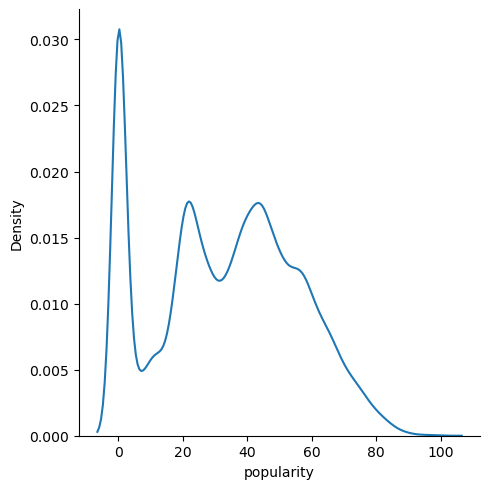

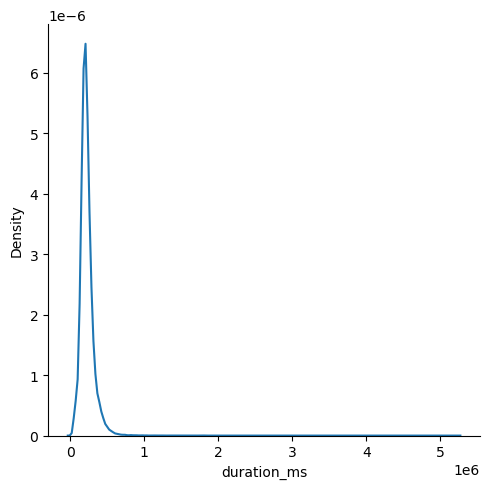

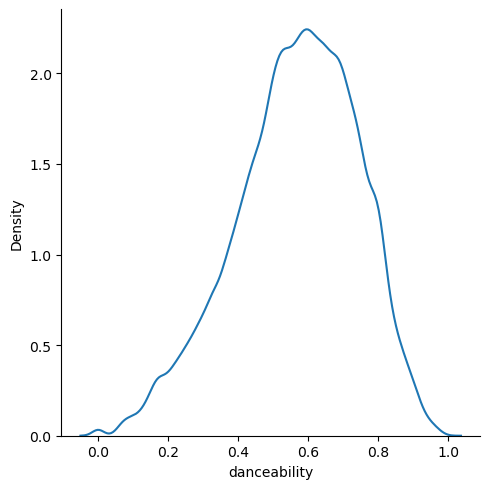

In [179]:
# What are the distributions of song popularity, duration_ms, and danceability? Use appropriate visualizations.
sns.displot(data=df,
            x="popularity",
            kind="kde")
sns.displot(data=df,
            x="duration_ms",
            kind="kde")
sns.displot(data=df,
            x="danceability",
            kind="kde")

In [180]:
# How many unique genres are in the dataset? List the top 20. (Explain how you choose to list the top 20)
unique_values = df['track_genre'].unique()
unique_values
print("Unique Values in 'track_genre':")
for value in unique_values:
    print(f"- {value}")

Unique Values in 'track_genre':
- acoustic
- afrobeat
- alt-rock
- alternative
- ambient
- anime
- black-metal
- bluegrass
- blues
- brazil
- breakbeat
- british
- cantopop
- chicago-house
- children
- chill
- classical
- club
- comedy
- country
- dance
- dancehall
- death-metal
- deep-house
- detroit-techno
- disco
- disney
- drum-and-bass
- dub
- dubstep
- edm
- electro
- electronic
- emo
- folk
- forro
- french
- funk
- garage
- german
- gospel
- goth
- grindcore
- groove
- grunge
- guitar
- happy
- hard-rock
- hardcore
- hardstyle
- heavy-metal
- hip-hop
- honky-tonk
- house
- idm
- indian
- indie-pop
- indie
- industrial
- iranian
- j-dance
- j-idol
- j-pop
- j-rock
- jazz
- k-pop
- kids
- latin
- latino
- malay
- mandopop
- metal
- metalcore
- minimal-techno
- mpb
- new-age
- opera
- pagode
- party
- piano
- pop-film
- pop
- power-pop
- progressive-house
- psych-rock
- punk-rock
- punk
- r-n-b
- reggae
- reggaeton
- rock-n-roll
- rock
- rockabilly
- romance
- sad
- salsa
- samba


In [181]:
# The number of different genres
len(df.value_counts(df['track_genre']))

114

In [182]:
# List the top 20. (Explain how you choose to list the top 20)
unique_genres = df['track_genre'].nunique()
print("Number of unique genres:", unique_genres)

top_20_genres = df['track_genre'].value_counts().head(20)
print("Top 20 genres:")
print(top_20_genres)

Number of unique genres: 114
Top 20 genres:
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
Name: track_genre, dtype: int64


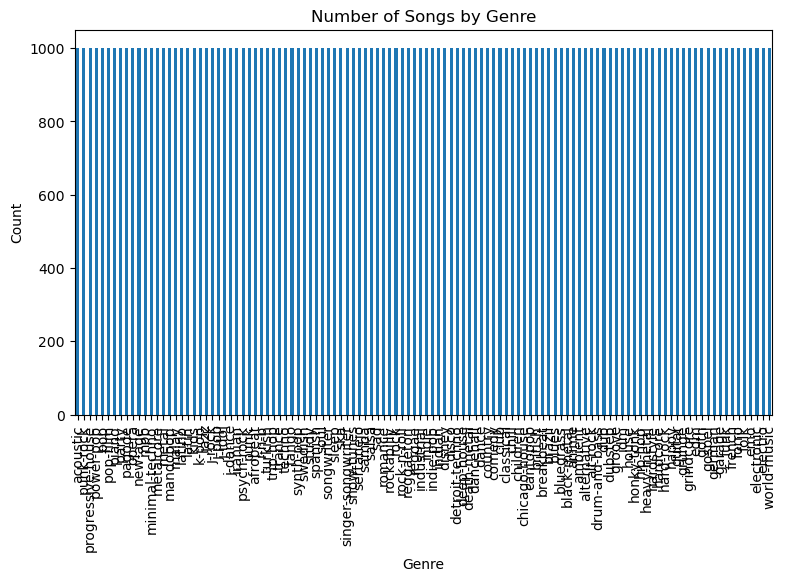

In [183]:
# Visualize the number of songs by genre. Which are the most common genres?
genre_counts = df['track_genre'].value_counts()

plt.figure(figsize=(9, 5))
genre_counts.plot(kind='bar')

plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

In [184]:
# Rank genres by the average popularity of their songs. Which genres tend to have more popular songs?
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
popularity

track_genre
pop-film          59.283
k-pop             56.896
chill             53.651
sad               52.379
grunge            49.594
                   ...  
chicago-house     12.339
detroit-techno    11.174
latin              8.297
romance            3.245
iranian            2.210
Name: popularity, Length: 114, dtype: float64

In [185]:
# Explore other characteristics (like danceability, energy, etc.) by genre. Are there any noticeable differences or trends?
energy = df.groupby('track_genre')['energy'].mean().sort_values(ascending=False)
energy

track_genre
death-metal    0.931470
grindcore      0.924201
metalcore      0.914485
happy          0.910971
hardstyle      0.901246
                 ...   
disney         0.302519
romance        0.294304
ambient        0.237162
new-age        0.214501
classical      0.189827
Name: energy, Length: 114, dtype: float64

In [186]:
dance = df.groupby('track_genre')['danceability'].mean().sort_values(ascending=False)
dance

track_genre
kids             0.778906
chicago-house    0.766176
reggaeton        0.758521
latino           0.757057
reggae           0.745331
                   ...   
opera            0.313563
iranian          0.300686
black-metal      0.296411
grindcore        0.271854
sleep            0.167923
Name: danceability, Length: 114, dtype: float64

In [187]:
duration = df.groupby('track_genre')['duration_ms'].mean().sort_values(ascending=False)
duration

track_genre
detroit-techno    372012.402
minimal-techno    368863.246
chicago-house     366853.868
breakbeat         321762.218
iranian           319709.537
                     ...    
disney            156257.344
sad               153800.880
study             141568.534
children          138987.757
grindcore         133753.507
Name: duration_ms, Length: 114, dtype: float64

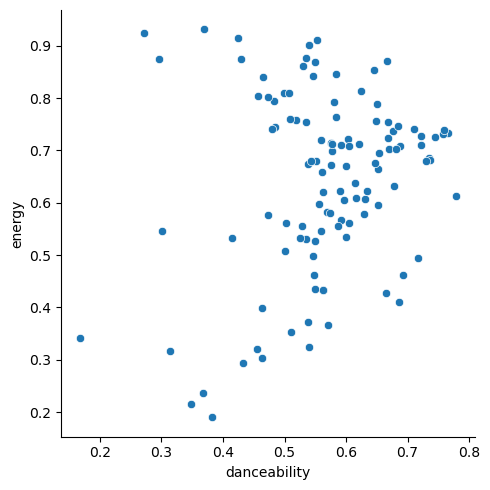

In [188]:
# Investigate the relationship between danceability and energy. Do songs that are more danceable tend to have more energy? Use a scatter plot.
sns.relplot(data=df,
            x=dance,
            y=energy,
            kind="scatter")

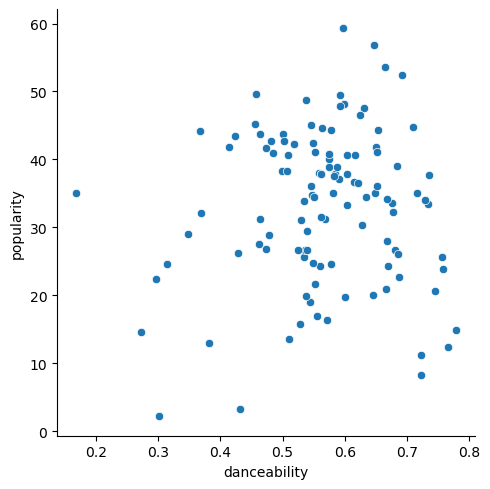

In [189]:
# How does song popularity relate to other characteristics like danceability, loudness, or tempo?
sns.relplot(data=df,
            x=dance,
            y=popularity,
            kind="scatter")

In [190]:
# How do explicit songs compare to non-explicit ones in terms of popularity or other characteristics?
# First we group data into explicit and non-explicit songs

explicit_songs = df[df['explicit'] == True]  # Select rows where 'explicit' is True
non_explicit_songs = df[df['explicit'] == False]  # Select rows where 'explicit' is False

# Compare popularity using summary statistics
explicit_popularity_mean = explicit_songs['popularity'].mean()
non_explicit_popularity_mean = non_explicit_songs['popularity'].mean()

# Print the mean popularity for explicit and non-explicit songs
print(f"Mean Popularity for Explicit Songs: {explicit_popularity_mean}")
print(f"Mean Popularity for Non-Explicit Songs: {non_explicit_popularity_mean}")

Mean Popularity for Explicit Songs: 36.4541910331384
Mean Popularity for Non-Explicit Songs: 32.937891475545065


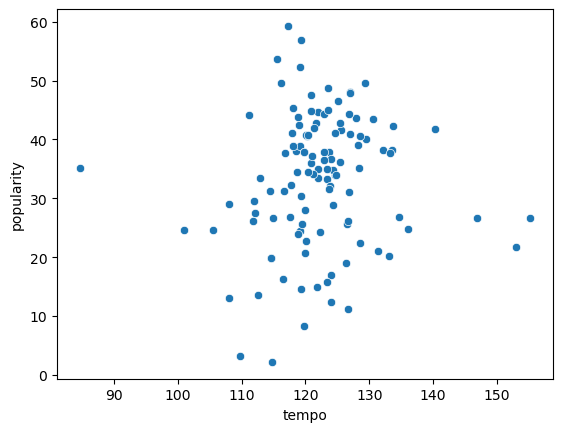

In [191]:
# Are there any trends related to tempo or time_signature?
tempo = df.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=df, x=tempo, y=popularity)
plt.show()

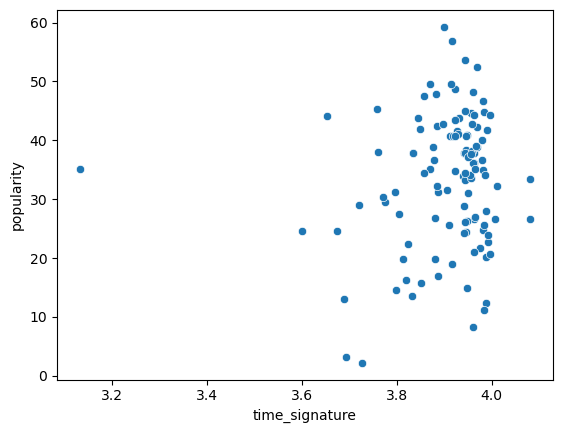

In [192]:
# Plot for time_signature
time_signature = df.groupby('track_genre')['time_signature'].mean().sort_values(ascending=False)
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=df, x=time_signature, y=popularity)
plt.show()

# Part 2

## Goals of Part 2
    1. Pre-processing for PCA (encoding & scaling)
    2. PCA and explanations of results
    3. Clustering
## Relevant libraries for this part
    1. StandardScaler
    2. PCA
    3. KMeans



In [193]:
# Importing StandardScaler from scikit-learn (sklearn)
from sklearn.preprocessing import StandardScaler

# Importing PCA (Principal Component Analysis) from scikit-learn (sklearn)
from sklearn.decomposition import PCA

# Importing KMeans clustering algorithm from scikit-learn (sklearn)
from sklearn.cluster import KMeans

# Importing LabelEncoder from scikit-learn (sklearn)
from sklearn.preprocessing import LabelEncoder

In [194]:
#Inspect Data Types: 
# We have to confirm the data types within the columns. 

# We can do this by checking the unique data types present in the column
for column in df.columns:
    data_type = df[column].apply(type).unique()
    print(f"Column '{column}' data types: {data_type}")

Column 'Unnamed: 0' data types: [<class 'int'>]
Column 'track_id' data types: [<class 'str'>]
Column 'artists' data types: [<class 'str'> <class 'int'>]
Column 'album_name' data types: [<class 'str'> <class 'int'>]
Column 'track_name' data types: [<class 'str'> <class 'int'>]
Column 'popularity' data types: [<class 'int'>]
Column 'duration_ms' data types: [<class 'int'>]
Column 'explicit' data types: [<class 'bool'>]
Column 'danceability' data types: [<class 'float'>]
Column 'energy' data types: [<class 'float'>]
Column 'key' data types: [<class 'int'>]
Column 'loudness' data types: [<class 'float'>]
Column 'mode' data types: [<class 'int'>]
Column 'speechiness' data types: [<class 'float'>]
Column 'acousticness' data types: [<class 'float'>]
Column 'instrumentalness' data types: [<class 'float'>]
Column 'liveness' data types: [<class 'float'>]
Column 'valence' data types: [<class 'float'>]
Column 'tempo' data types: [<class 'float'>]
Column 'time_signature' data types: [<class 'int'>]

In [195]:
# check for columns that have more than one data type
for column in df.columns:
    unique_data_types = df[column].apply(type).unique()
    if len(unique_data_types) > 1:
        print(f"Column '{column}' has multiple data types: {unique_data_types}")


Column 'artists' has multiple data types: [<class 'str'> <class 'int'>]
Column 'album_name' has multiple data types: [<class 'str'> <class 'int'>]
Column 'track_name' has multiple data types: [<class 'str'> <class 'int'>]


In [198]:
# Convert all entries in 'track_name' and 'album_name' to strings
df['artists'] = df['artists'].astype(str)
df['track_name'] = df['track_name'].astype(str)
df['album_name'] = df['album_name'].astype(str)

In [199]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode all categorical columns in the DataFrame
for column in df.select_dtypes(include=['object']):
    df[column + '_id'] = encoder.fit_transform(df[column])

In [200]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,liveness,valence,tempo,time_signature,track_genre,track_id_id,artists_id,album_name_id,track_name_id,track_genre_id
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.3580,0.715,87.917,4,acoustic,62846,10358,8100,11741,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.1010,0.267,77.489,4,acoustic,55668,3288,14796,22528,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.1170,0.120,76.332,4,acoustic,19766,12398,39162,60774,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.1320,0.143,181.740,3,acoustic,77942,14840,8580,9580,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0829,0.167,119.949,4,acoustic,68242,5256,16899,25689,0


In [201]:
id_columns = [col for col in df.columns if '_id' in col]
df[id_columns]

,track_id,track_id_id,artists_id,album_name_id,track_name_id,track_genre_id
0,5SuOikwiRyPMVoIQDJUgSV,62846,10358,8100,11741,0
1,4qPNDBW1i3p13qLCt0Ki3A,55668,3288,14796,22528,0
2,1iJBSr7s7jYXzM8EGcbK5b,19766,12398,39162,60774,0
3,6lfxq3CG4xtTiEg7opyCyx,77942,14840,8580,9580,0
4,5vjLSffimiIP26QG5WcN2K,68242,5256,16899,25689,0
...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,25199,22487,66,53329,113
113996,1hIz5L4IB9hN3WRYPOCGPw,19583,22487,66,65090,113
113997,6x8ZfSoqDjuNa5SVP5QjvX,80127,4953,5028,38207,113
113998,2e6sXL2bYv4bSz6VTdnfLs,30456,18535,7238,21507,113


In [203]:
# We select the below features from the dataframe
selected_columns = ['Unnamed: 0', 'danceability',  'energy', 'popularity',  'duration_ms', 'track_name_id',  'track_genre_id', 'track_id_id',  'artists_id',  'album_name_id', 'liveness',  'valence',  'tempo',  'time_signature']
data_to_cluster = df[selected_columns]
data_to_cluster.head()

,Unnamed: 0,danceability,energy,popularity,duration_ms,track_name_id,track_genre_id,track_id_id,artists_id,album_name_id,liveness,valence,tempo,time_signature
0,0,0.676,0.4610,73,230666,11741,0,62846,10358,8100,0.3580,0.715,87.917,4
1,1,0.420,0.1660,55,149610,22528,0,55668,3288,14796,0.1010,0.267,77.489,4
2,2,0.438,0.3590,57,210826,60774,0,19766,12398,39162,0.1170,0.120,76.332,4
3,3,0.266,0.0596,71,201933,9580,0,77942,14840,8580,0.1320,0.143,181.740,3
4,4,0.618,0.4430,82,198853,25689,0,68242,5256,16899,0.0829,0.167,119.949,4


In [146]:
#  Handle any missing or categorical data.
# Standardize the dataset since PCA is sensitive to the magnitude of the data.
scaler = StandardScaler()
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)
data_to_cluster_scaled

array([[-1.73203561,  0.62924424, -0.71714792, ...,  0.92930586,
        -1.14186279,  0.22182318],
       [-1.73200523, -0.84590798, -1.88997974, ..., -0.79868969,
        -1.48971712,  0.22182318],
       [-1.73197484, -0.74218634, -1.12266943, ..., -1.36568823,
        -1.528312  ,  0.22182318],
       ...,
       [ 1.73197484,  0.35841551, -1.24194046, ...,  1.03730558,
         0.34125493,  0.22182318],
       [ 1.73200523,  0.11639835, -0.53824138, ..., -0.23554828,
         0.4607423 ,  0.22182318],
       [ 1.73203561, -0.23510276, -0.6137797 , ...,  0.90230593,
        -1.43270877,  0.22182318]])

In [147]:
# Conduct a PCA on the song characteristics.
# Create a PCA instance with the desired number of components
n_components = 5  # Choose the number of components you want to keep
pca = PCA(n_components=n_components)

# Fit the PCA model to the data and transform the data to the principal components
X_pca = pca.fit_transform(data_to_cluster_scaled)

# Visualize the explained variance for each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.14431368 0.12711134 0.09562564 0.09136177 0.07540131]


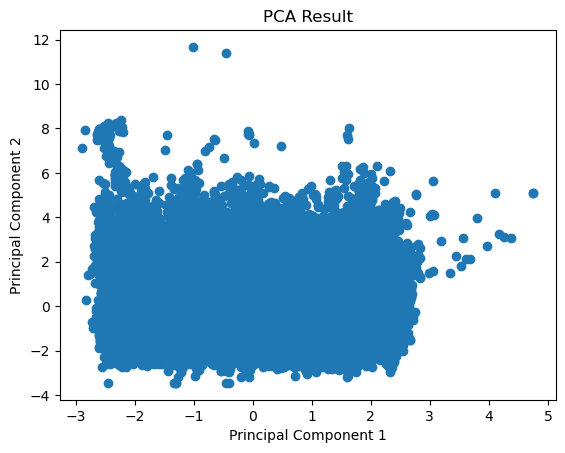

In [148]:
# Reduce the dataset's dimensions based on the PCA results and visualize the data in the reduced dimension space.
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

In [ ]:
# Choose a clustering algorithm (e.g., KMeans, DBSCAN, or Hierarchical).
## We're using the Kmeans because we have a lot of datapoints.

/Users/tobiasmjensen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tobiasmjensen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tobiasmjensen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tobiasmjensen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

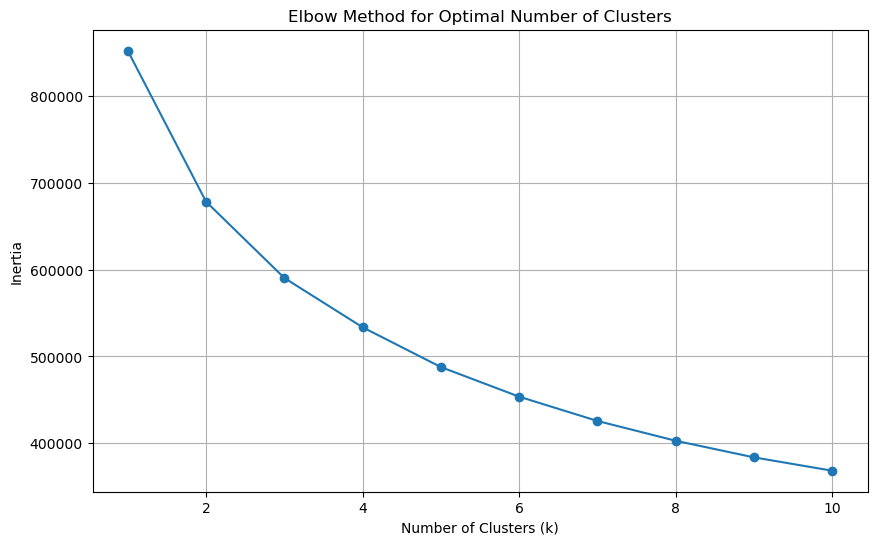

In [149]:
# Determine the optimal number of clusters (if needed, like in KMeans). explain how you get to that number of clusters

# Initialize variables
inertia_values = []
k_range = range(1, 11)  # We will check for up to 10 clusters
# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

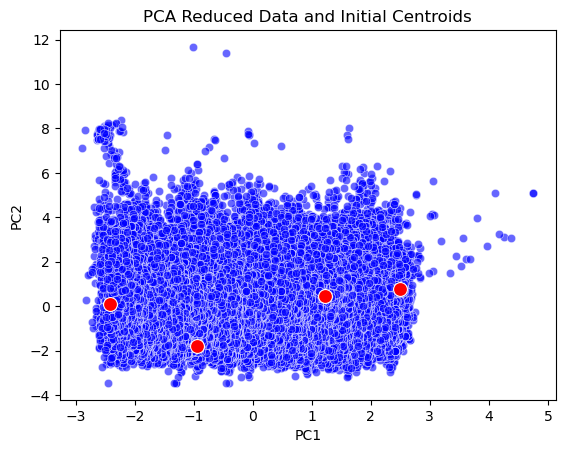

In [152]:
k=4
centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]
# Plot observations
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and Initial Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [155]:
def k_means_simple(X_pca, k, max_iters=100):
    # 1. Initialize the k cluster centroids
    centroids = X_pca[np.random.choice(X_pca.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # 2. Assign each data point to the closest centroid
        distances = np.linalg.norm(X_pca - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)

        # 3. Recompute the centroids
        new_centroids = np.array([X_pca[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Print the centroids
labels, final_centroids = k_means_simple(X_pca, 4)
print("Cluster centroids:\n", final_centroids)

Cluster centroids:
 [[ 1.37599872 -0.28288352  0.09555867  0.03666577  0.01901141]
 [-1.22693641 -0.73788117  0.62121702 -0.30574772  0.05168129]
 [-0.18135889  2.31275897  0.22148895 -0.58248881 -0.32852107]
 [-0.87980001 -0.0061081  -1.08414557  0.67529085  0.10557236]]


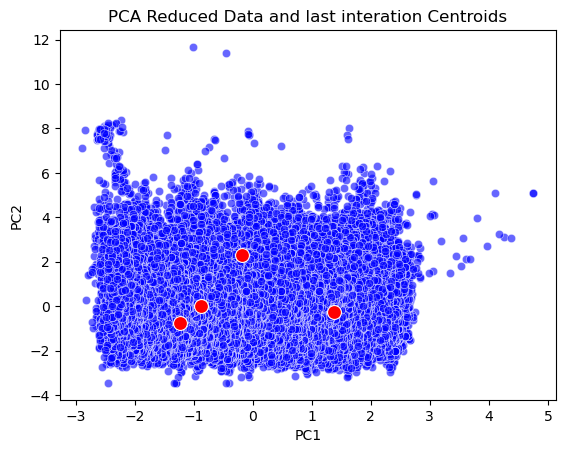

In [156]:
# Cluster the songs based on the reduced dimensions from PCA.
# Plot observations after 100st interation
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.6, color='blue')

# Plot centroids
sns.scatterplot(x=final_centroids[:, 0], y=final_centroids[:, 1], color='red', s=100)

plt.title('PCA Reduced Data and last interation Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# Visualize the clusters and interpret any patterns. Write your interpretations

# Part 3

## Goals of Part 3
    1. Vectorization   
    2. Cosine similarities
    3. Build and test recommender
    Objective: Develop a basic music recommender system that suggests songs based on textual data and put it in a small grad.io app
## Relevant libraries for this part
    1. linear_kernel
    2. TfidfVectorizer
    3. grad.io

Build the Recommender:

  Create a function that takes a song name as input and outputs a list of songs recommended based on textual similarity. For this, you'll use the cosine similarity scores.

In [205]:
# Import the liberarys
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as ss

In [159]:
# Refine the Textual Data: Consider merging multiple textual columns (e.g., artist name + track name) to generate recommendations based on combined textual data.

# Merge 'artists' and 'track_name' columns with a separator
df['song_artist'] = df['artists'] + ' - ' + df['track_name']

# Display the DataFrame with the new 'combined_text' column
df[['artists', 'track_name', 'song_artist']]

,artists,track_name,song_artist
0,Gen Hoshino,Comedy,Gen Hoshino - Comedy
1,Ben Woodward,Ghost - Acoustic,Ben Woodward - Ghost - Acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,Ingrid Michaelson;ZAYN - To Begin Again
3,Kina Grannis,Can't Help Falling In Love,Kina Grannis - Can't Help Falling In Love
4,Chord Overstreet,Hold On,Chord Overstreet - Hold On
...,...,...,...
113995,Rainy Lullaby,Sleep My Little Boy,Rainy Lullaby - Sleep My Little Boy
113996,Rainy Lullaby,Water Into Light,Rainy Lullaby - Water Into Light
113997,Cesária Evora,Miss Perfumado,Cesária Evora - Miss Perfumado
113998,Michael W. Smith,Friends,Michael W. Smith - Friends


In [206]:
ones = np.ones(len(df), np.uint64)
matrix = ss.coo_matrix((ones, (df['track_id_id'], df['popularity'])))

In [207]:
# Miscellaneous operation.
matrix

<89741x101 sparse matrix of type '<class 'numpy.uint64'>'
	with 114000 stored elements in COOrdinate format>

In [211]:
print(matrix.row) # check row indices
print(matrix.col) # check column indices
print(matrix.shape)
print(matrix.data.shape)

[62846 55668 19766 ... 80127 30456 31078]
[73 55 57 ... 22 41 22]
(89741, 101)
(114000,)


In [ ]:
# Filtering by Additional Features: How might you modify the recommender to suggest only songs from a particular genre or only non-explicit songs?

In [ ]:
#  Improving Efficiency: If you have a very large dataset, computing cosine similarities can be time-consuming. How might you address this efficiency concern?